In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
train_dir = './Training'
batch_size = 128
seed = 42
shape = (64,64)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.5, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)
vali_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  

In [3]:
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=shape,
                                              shuffle=True,
                                              seed=seed,
                                              batch_size=batch_size,
                                              subset='training')
vali_set = vali_datagen.flow_from_directory(train_dir,
                                            target_size=shape,
                                            shuffle=True,
                                            seed=seed,
                                            batch_size=batch_size,
                                            subset='validation')

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.


In [4]:
early_stopping = EarlyStopping(min_delta=1e-3,
                               patience=3,
                               restore_best_weights=True)

In [5]:
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                       patience=2, min_lr=0.00003)

In [6]:
model = Sequential()

model.add(Conv2D(64, 3, input_shape=(shape+(3, ))))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(256, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(512, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(131,activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
hist = model.fit(train_set,
                 validation_data=vali_set,
                 callbacks=[early_stopping, lr],
                 epochs=20)

Epoch 1/20
424/424 [==============================] - 229s 541ms/step - loss: 1.0615 - accuracy: 0.6811 - val_loss: 5.6960 - val_accuracy: 0.1555
Epoch 2/20
424/424 [==============================] - 222s 523ms/step - loss: 0.2850 - accuracy: 0.9035 - val_loss: 1.0416 - val_accuracy: 0.7094
Epoch 3/20
424/424 [==============================] - 215s 508ms/step - loss: 0.1736 - accuracy: 0.9396 - val_loss: 0.6581 - val_accuracy: 0.8282
Epoch 4/20
424/424 [==============================] - 211s 498ms/step - loss: 0.1422 - accuracy: 0.9515 - val_loss: 0.4686 - val_accuracy: 0.8696
Epoch 5/20
424/424 [==============================] - 207s 488ms/step - loss: 0.1212 - accuracy: 0.9606 - val_loss: 0.1864 - val_accuracy: 0.9352
Epoch 6/20
424/424 [==============================] - 268s 632ms/step - loss: 0.1054 - accuracy: 0.9643 - val_loss: 0.2919 - val_accuracy: 0.9130
Epoch 7/20
424/424 [==============================] - 244s 575ms/step - loss: 0.0894 - accuracy: 0.9707 - val_loss: 0.4631 -

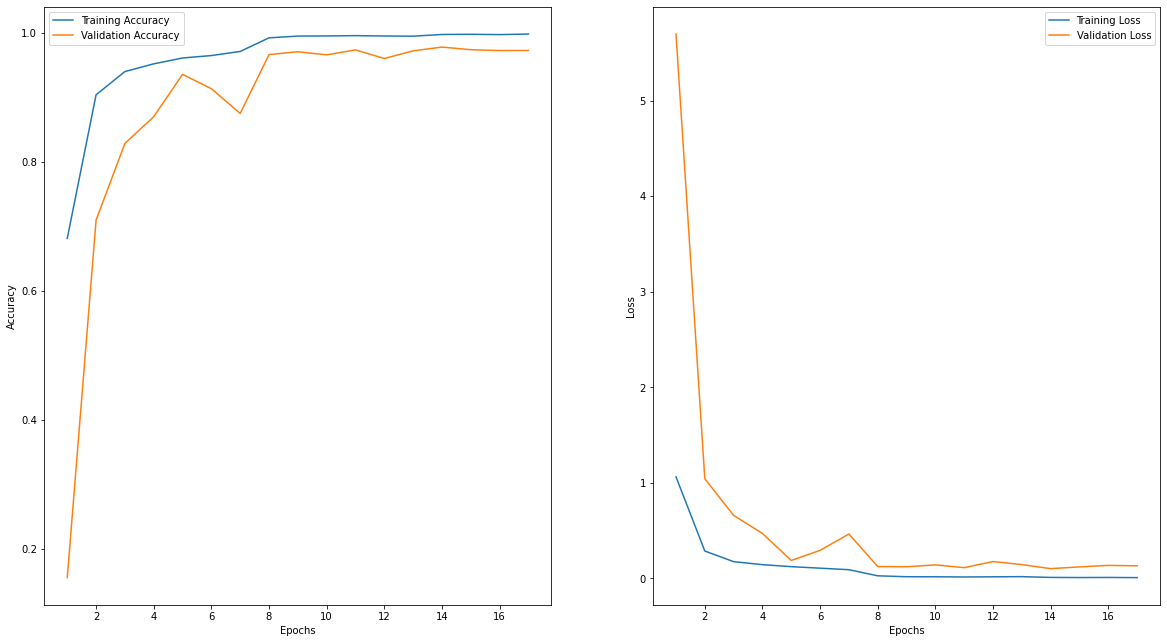

In [10]:
epoch_list = list(range(6, len(hist.history['accuracy']) + 1))
fig, axes = plt.subplots(1,2, figsize=(20,11))
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))
axes[0].plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
axes[0].legend(('Training Accuracy', 'Validation Accuracy'))
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[1].plot(epoch_list, hist.history['loss'], epoch_list, hist.history['val_loss'])
axes[1].legend(('Training Loss', 'Validation Loss'))
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')

plt.show()

In [25]:
def show_images(gen):
    image_batch, _ =next(gen)
    predictions = model.predict(image_batch)
    
    classes = dict()
    for k,v in gen.class_indices.items():
        classes[v] = k

    plt.figure(figsize=(20,20))
    for i in range(gen.batch_size):
        plt.subplot(gen.batch_size//8 +1, 8,i+1)
        plt.imshow(image_batch[i])
        plt.title(classes[predictions[i].argmax()])
        plt.axis('off')

In [24]:
test_dir = './Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=shape,
                                            shuffle=True,
                                            seed=seed,
                                            batch_size=32)

Found 22688 images belonging to 131 classes.


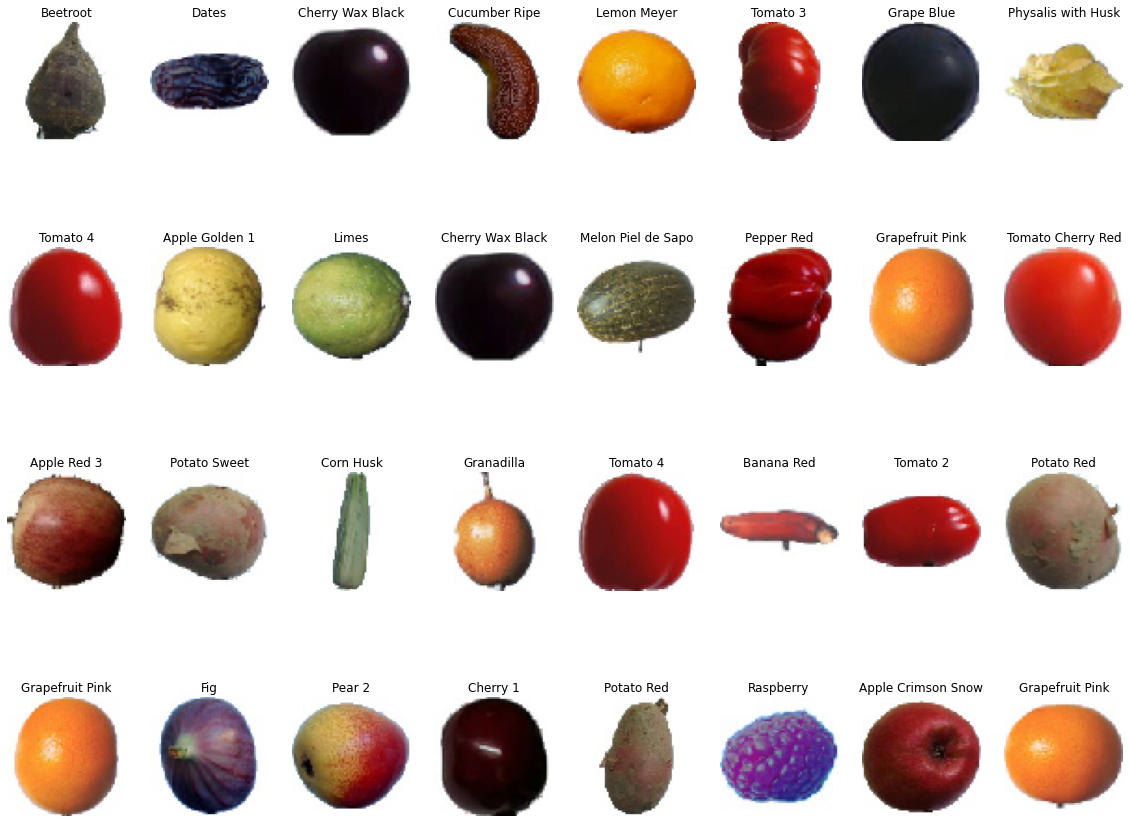

In [27]:
show_images(test_set)